# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
!pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



603

In [3]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

set_counter = 0

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#create list 
data = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        country = response["sys"]["country"]
        cloudiness = response["clouds"]["all"]
        date = response["dt"]
        humidity = response ["main"]["humidity"]
        temp = response["main"]["temp_max"]
        speed = response["wind"]["speed"]
        data.append({"Cities": city, 
                     "Latitude": lat,
                     "Longitude": lon,
                     "Country": country, 
                     "Cloudiness": cloudiness, 
                     "Date": date, 
                     "Humidity": humidity,
                     "Max Temperature": temp, 
                     "Wind Speed": speed})
    except: 
        print("City not found...")
    
#use a try except
    
print(data)


City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not found...
City not f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
dataframe = pd.DataFrame(data)
dataframe.count()

dataframe.head()

,Cities,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,nanakuli,90,US,1572838626,94,21.39,-158.15,28.00,1.50
1,albany,1,US,1572838614,64,42.65,-73.75,4.44,1.50
2,kisangani,100,CD,1572839106,99,0.52,25.21,19.97,0.62
3,dunedin,15,NZ,1572838616,55,-45.87,170.50,20.56,2.24
4,talnakh,75,RU,1572838631,77,69.49,88.39,-18.00,8.00


In [ ]:
cities_list = zip(new_cities,cloudiness,country,date,humidity,temp,lat,lng)

output_file = os.path.join('cities.csv')

with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

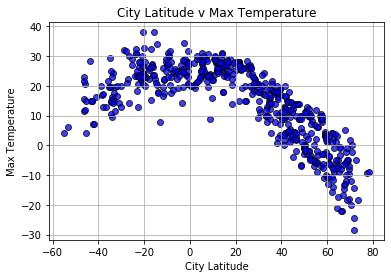

In [12]:
latitude = dataframe["Latitude"]
temperature = dataframe["Max Temperature"]

plt.scatter(latitude, temperature, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude v Max Temperature")

plt.savefig("latitude_temp.png")

#### Latitude vs. Humidity Plot

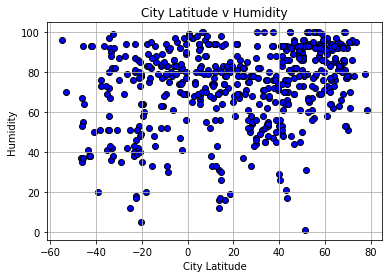

In [13]:
latitude = dataframe["Latitude"]
humidity = dataframe["Humidity"]

plt.scatter(latitude, humidity, marker="o", facecolors="blue", edgecolors="black")

plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude v Humidity")

plt.savefig("latitude_humidity.png")

#### Latitude vs. Cloudiness Plot

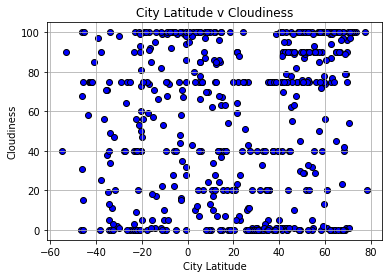

In [14]:
latitude = dataframe["Latitude"]
clouds = dataframe["Cloudiness"]

plt.scatter(latitude, clouds, marker="o", facecolors="blue", edgecolors="black")

plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude v Cloudiness")

plt.savefig("latitude_cloudiness.png")

#### Latitude vs. Wind Speed Plot

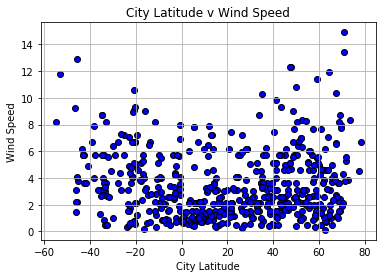

In [15]:
latitude = dataframe["Latitude"]
wind_speed = dataframe["Wind Speed"]

plt.scatter(latitude, wind_speed, marker="o", facecolors="blue", edgecolors="black")

plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude v Wind Speed")

plt.savefig("latitude_wind.png")